In [14]:
# 1. Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [16]:
df = pd.read_csv('spam_large.csv')

In [17]:
print("Dataset Shape:", df.shape)
print("First 5 rows:\n", df.head())
print("Label distribution:\n", df['label'].value_counts())

Dataset Shape: (500, 2)
First 5 rows:
   label                      message
0   ham   I'll be late today, sorry!
1   ham   I'll be late today, sorry!
2   ham   I'll be late today, sorry!
3   ham  Lunch at 1 PM works for me.
4   ham    See you at the gym later?
Label distribution:
 label
ham     250
spam    250
Name: count, dtype: int64


In [18]:
X = df['message']
y = df['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [20]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [21]:
y_pred = model.predict(X_test_vec)

In [22]:
# 8. Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [23]:


print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 1.0

Confusion Matrix:
 [[46  0]
 [ 0 54]]

Classification Report:
               precision    recall  f1-score   support

         ham       1.00      1.00      1.00        46
        spam       1.00      1.00      1.00        54

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [25]:
# 9. Example Predictions
examples = ["Free vacation! Click here to claim now!", "Hey, are we meeting tomorrow?"]
examples_vec = vectorizer.transform(examples)
predictions = model.predict(examples_vec)
for msg, pred in zip(examples, predictions):
    print(f"Message: {msg} => Prediction: {pred}")

Message: Free vacation! Click here to claim now! => Prediction: spam
Message: Hey, are we meeting tomorrow? => Prediction: ham


In [26]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         ham       1.00      1.00      1.00        46
        spam       1.00      1.00      1.00        54

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



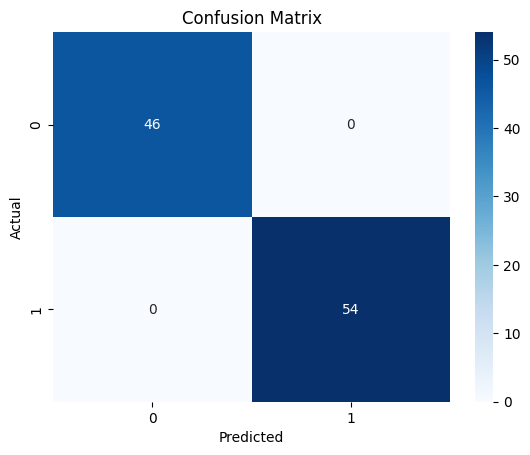

In [27]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()